In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Users/Umut/Desktop/ai-learning-path/numpy-pandas-matplot-3&4/raw/bitcoin_history.csv")
df = data.copy()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 20, 2025","96,628.40","98,722.29","96,481.41","98,347.95","98,347.95","31,327,236,096"
1,"Feb 19, 2025","95,532.53","96,855.59","95,011.97","96,635.61","96,635.61","28,990,872,862"
2,"Feb 18, 2025","95,773.81","96,695.38","93,388.84","95,539.55","95,539.55","37,325,720,482"
3,"Feb 17, 2025","96,179.01","97,032.23","95,243.55","95,773.38","95,773.38","27,336,550,690"
4,"Feb 16, 2025","97,580.49","97,725.59","96,060.98","96,175.03","96,175.03","16,536,755,396"
...,...,...,...,...,...,...,...
3805,"Sep 21, 2014",408.08,412.43,393.18,398.82,398.82,"26,580,100"
3806,"Sep 20, 2014",394.67,423.30,389.88,408.90,408.90,"36,863,600"
3807,"Sep 19, 2014",424.10,427.83,384.53,394.80,394.80,"37,919,700"
3808,"Sep 18, 2014",456.86,456.86,413.10,424.44,424.44,"34,483,200"


In [11]:
df.Date = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3810 entries, 2014-09-17 to 2025-02-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       3810 non-null   object
 1   High       3810 non-null   object
 2   Low        3810 non-null   object
 3   Close      3810 non-null   object
 4   Adj Close  3810 non-null   object
 5   Volume     3810 non-null   object
dtypes: object(6)
memory usage: 208.4+ KB


## data types operations

In [18]:
for col in df.columns:
    df[col] = df[col].str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print("{}: {}".format(col, df[col].dtype))


Open: float64
High: float64
Low: float64
Close: float64
Adj Close: float64
Volume: int64


# 7 günlük oynaklık

In [19]:
df['oynaklık_7gün'] = df['Adj Close'].rolling(7).std()

Text(0, 0.5, 'Standart Sapma')

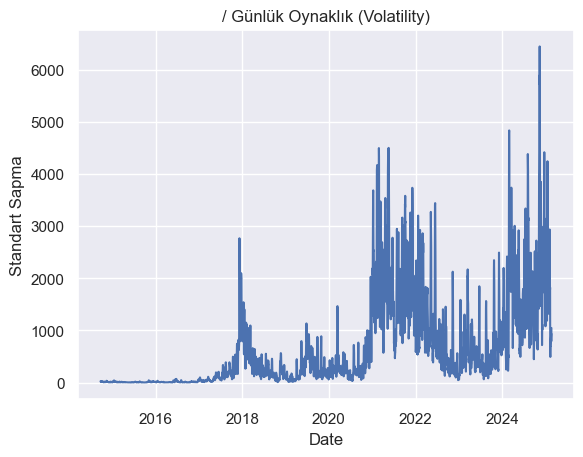

In [37]:
sns.lineplot(data=df, x=df.index, y="oynaklık_7gün")
plt.title("/ Günlük Oynaklık (Volatility)")
plt.ylabel('Standart Sapma')

# 30 günlük EMA

In [20]:
df['ema_30gün'] = df['Adj Close'].ewm(span=30, adjust=False).mean()

Text(0.5, 1.0, 'Bitcoin Fiyatı ve 30 Günlük EMA')

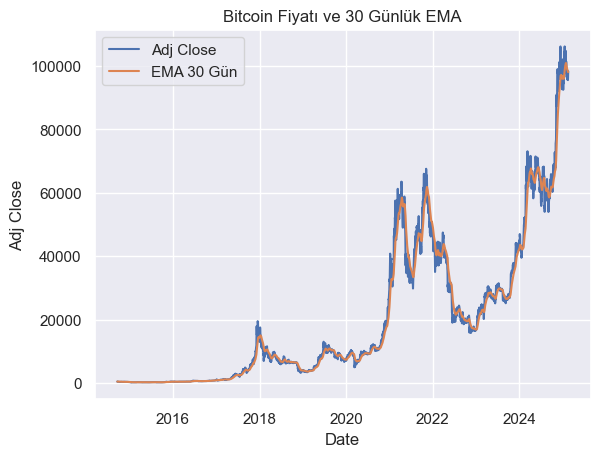

In [38]:
sns.set_theme(style="darkgrid")

sns.lineplot(data=df, x=df.index, y="Adj Close", label="Adj Close")
sns.lineplot(data=df, x=df.index, y="ema_30gün", label="EMA 30 Gün")
plt.title("Bitcoin Fiyatı ve 30 Günlük EMA")